<a href="https://colab.research.google.com/github/Mallika39/AIML/blob/master/ASSIGNMENT_37_%5B09_07_2020%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

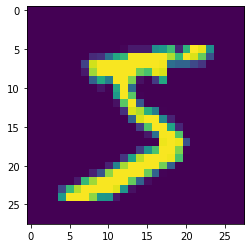

In [6]:
plt.imshow(train_digits[0])

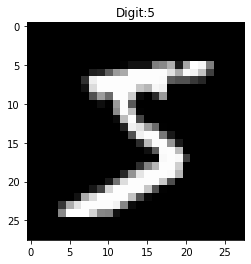

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

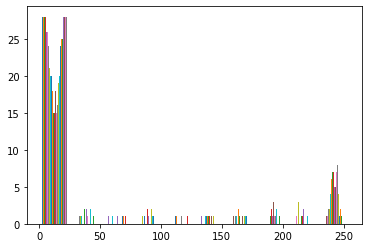

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([47496, 49820, 33422, 59432,   541, 11984, 55540, 23579, 29441,
       37581, 32793, 25393,  3055, 57388,  8558,  3720])

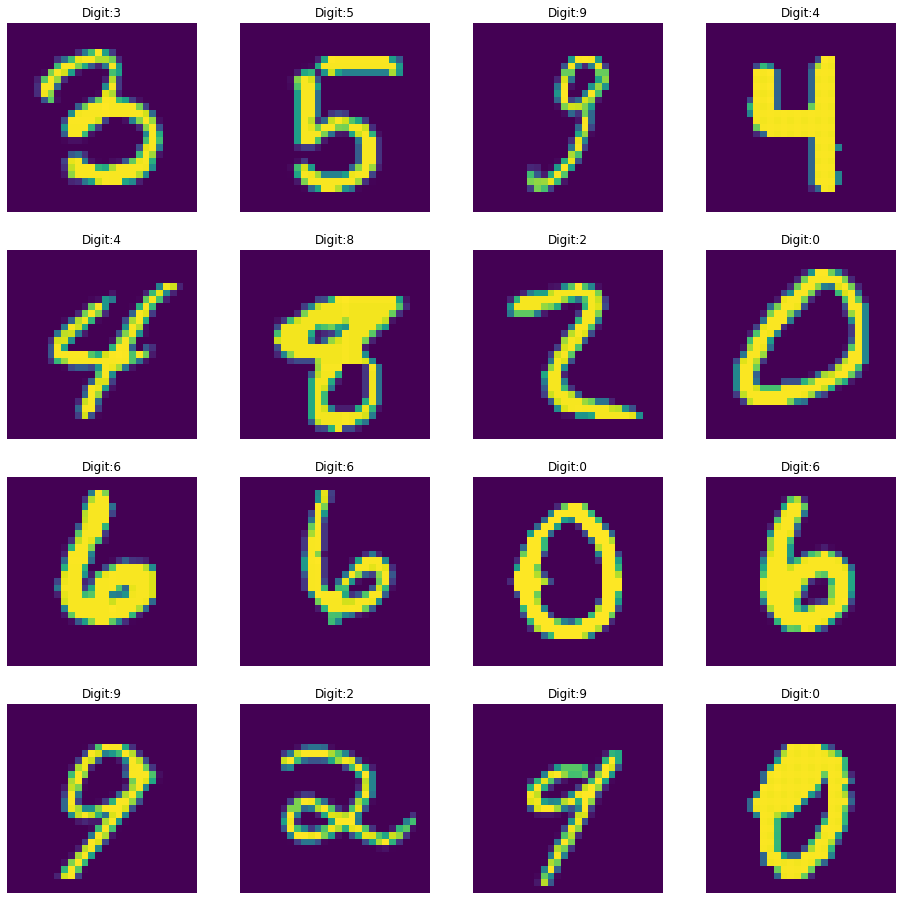

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat=to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 119us/step - loss: 0.2500 - accuracy: 0.9236 - val_loss: 0.1409 - val_accuracy: 0.9580
Epoch 2/5
54000/54000 [==============================] - 6s 112us/step - loss: 0.1104 - accuracy: 0.9665 - val_loss: 0.1122 - val_accuracy: 0.9697
Epoch 3/5
54000/54000 [==============================] - 6s 112us/step - loss: 0.0819 - accuracy: 0.9753 - val_loss: 0.1103 - val_accuracy: 0.9698
Epoch 4/5
54000/54000 [==============================] - 6s 110us/step - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.1296 - val_accuracy: 0.9673
Epoch 5/5
54000/54000 [==============================] - 6s 112us/step - loss: 0.0522 - accuracy: 0.9833 - val_loss: 0.1246 - val_accuracy: 0.9700


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 27us/step


[0.09274415211402812, 0.9739000201225281]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.6570598e-06, 1.3360541e-04, 5.1531143e-04, 2.8717984e-03,
        1.0740109e-05, 7.9794081e-06, 7.3572522e-08, 9.9367923e-01,
        1.0908071e-03, 1.6868807e-03]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])

array([[3.6570527e-06, 1.3360541e-04, 5.1531120e-04, 2.8717956e-03,
        1.0740099e-05, 7.9794081e-06, 7.3572522e-08, 9.9367923e-01,
        1.0908067e-03, 1.6868791e-03],
       [3.0906484e-13, 1.7069030e-09, 1.0000000e+00, 2.7446259e-09,
        1.1888168e-11, 1.5186475e-11, 1.4397079e-09, 2.9620296e-11,
        2.2066353e-09, 7.4379251e-15],
       [8.7914437e-08, 9.9706382e-01, 1.4742225e-03, 1.1904822e-05,
        1.3185501e-04, 2.1561812e-06, 1.3016265e-05, 1.2386939e-03,
        6.0107846e-05, 4.1146518e-06],
       [9.9467260e-01, 3.5317544e-06, 2.0400948e-04, 3.5765719e-05,
        5.7983441e-05, 1.5006313e-05, 5.2598357e-04, 1.0918857e-05,
        1.7952672e-03, 2.6790709e-03],
       [2.3399204e-07, 1.9763763e-07, 2.0960735e-05, 2.0236268e-07,
        9.9989116e-01, 2.8380339e-06, 1.9603716e-05, 7.6772330e-06,
        8.6540450e-07, 5.6207358e-05],
       [2.1163066e-10, 9.9992156e-01, 3.4117452e-06, 8.6281226e-08,
        2.3213443e-06, 7.9923623e-09, 3.5413862e-08, 7.21

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.6570598e-06, 1.3360541e-04, 5.1531143e-04, 2.8717984e-03,
        1.0740109e-05, 7.9794081e-06, 7.3572522e-08, 9.9367923e-01,
        1.0908071e-03, 1.6868807e-03]], dtype=float32)

In [25]:
history.history

{'accuracy': [0.92355555, 0.9664815, 0.97525924, 0.97996294, 0.9832963],
 'loss': [0.24996358239926675,
  0.11044744387124147,
  0.08191071473103431,
  0.06432285341594575,
  0.052217955704347264],
 'val_accuracy': [0.9580000042915344,
  0.9696666598320007,
  0.9698333144187927,
  0.9673333168029785,
  0.9700000286102295],
 'val_loss': [0.14090217902014654,
  0.11215393734599154,
  0.1103204602325956,
  0.12958186537834504,
  0.12461198434606194]}

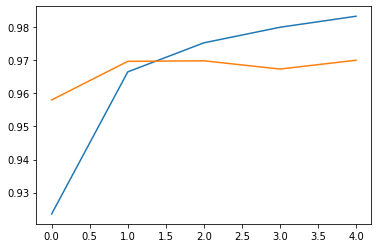

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 125us/step - loss: 0.2643 - accuracy: 0.9202 - val_loss: 0.1481 - val_accuracy: 0.9577
Epoch 2/5
54000/54000 [==============================] - 6s 119us/step - loss: 0.1118 - accuracy: 0.9658 - val_loss: 0.1216 - val_accuracy: 0.9640
Epoch 3/5
54000/54000 [==============================] - 6s 119us/step - loss: 0.0828 - accuracy: 0.9745 - val_loss: 0.1265 - val_accuracy: 0.9605
Epoch 4/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.1051 - val_accuracy: 0.9737
Epoch 5/5
54000/54000 [==============================] - 7s 121us/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.1027 - val_accuracy: 0.9758


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 28us/step


[0.09168098959270574, 0.9753000140190125]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.6570598e-06, 1.3360541e-04, 5.1531143e-04, 2.8717984e-03,
        1.0740109e-05, 7.9794081e-06, 7.3572522e-08, 9.9367923e-01,
        1.0908071e-03, 1.6868807e-03]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])

array([[3.6570527e-06, 1.3360541e-04, 5.1531120e-04, 2.8717956e-03,
        1.0740099e-05, 7.9794081e-06, 7.3572522e-08, 9.9367923e-01,
        1.0908067e-03, 1.6868791e-03],
       [3.0906484e-13, 1.7069030e-09, 1.0000000e+00, 2.7446259e-09,
        1.1888168e-11, 1.5186475e-11, 1.4397079e-09, 2.9620296e-11,
        2.2066353e-09, 7.4379251e-15],
       [8.7914437e-08, 9.9706382e-01, 1.4742225e-03, 1.1904822e-05,
        1.3185501e-04, 2.1561812e-06, 1.3016265e-05, 1.2386939e-03,
        6.0107846e-05, 4.1146518e-06],
       [9.9467260e-01, 3.5317544e-06, 2.0400948e-04, 3.5765719e-05,
        5.7983441e-05, 1.5006313e-05, 5.2598357e-04, 1.0918857e-05,
        1.7952672e-03, 2.6790709e-03],
       [2.3399204e-07, 1.9763763e-07, 2.0960735e-05, 2.0236268e-07,
        9.9989116e-01, 2.8380339e-06, 1.9603716e-05, 7.6772330e-06,
        8.6540450e-07, 5.6207358e-05],
       [2.1163066e-10, 9.9992156e-01, 3.4117452e-06, 8.6281226e-08,
        2.3213443e-06, 7.9923623e-09, 3.5413862e-08, 7.21

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.6570598e-06, 1.3360541e-04, 5.1531143e-04, 2.8717984e-03,
        1.0740109e-05, 7.9794081e-06, 7.3572522e-08, 9.9367923e-01,
        1.0908071e-03, 1.6868807e-03]], dtype=float32)

In [36]:
history.history

{'accuracy': [0.9202222, 0.9658148, 0.97448146, 0.9797037, 0.98348147],
 'loss': [0.26425507302830614,
  0.11177873877725668,
  0.08283047653300067,
  0.06489390404117121,
  0.052428185338710645],
 'val_accuracy': [0.9576666951179504,
  0.9639999866485596,
  0.9605000019073486,
  0.9736666679382324,
  0.9758333563804626],
 'val_loss': [0.14813624794284502,
  0.12162497505545616,
  0.12645780684053898,
  0.10509260348168512,
  0.10270256844093092]}

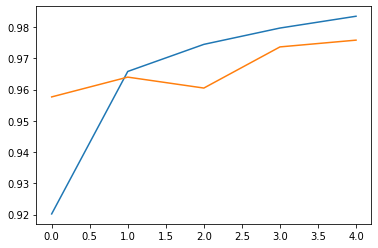

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])